# 0. IMPORTS & AUXILIARY COMMANDS

**Libraries and packages**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

**Auxiliary Commands**

In [2]:
# Sets thousands and decimals format
pd.options.display.float_format = '{:,.2f}'.format

# Set major size to figures on seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

# 1. FUNCTIONS

**Data loading functions**

In [3]:
def get_data(path):
    '''
    Return a Pandas DataFrame object of given the path csv file.

    Parameters:
        path: Path of file within the directories
    '''
    data = pd.read_csv(path)
    
    return data

**Data transforming functions**

In [4]:
def transform_data(data):
    # Selecting the indexes of non duplicates
    indexes = data['id'].drop_duplicates().index

    # Creating a new dataframe with distinct property id's
    data = data.iloc[indexes, :].reset_index(drop=True)
    
    # Converting Data Types

    # Converting data do datetime 
    data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

    # Converting bathrooms to interger bacause it doesn't make sense having 1.5 bathrooms. 
    # If there's any float, it will be converted to the closest interger
    data['bathrooms'] = round(data['bathrooms'], 0).astype('int64')

    # The same goes to floors
    data['floors'] = round(data['floors'], 0).astype('int64')

    # Changing waterfront variable input from 0/1 to 'No'/'Yes'
    data['waterfront'] = data['waterfront'].apply(lambda x: 'no' if x == 0 else 'yes')
    
    return data

**Data visualization functions**

In [5]:
def plot_boxplot(data, title=None):
    
    plot = sns.boxplot(data=data, palette='flare')
    plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: ,.0f}'))
    plt.title(title, fontsize=18)
    plt.show()

    return None

# 2. LOADING DATA

In [6]:
# Creating variable that will receive the file path
path = r'C:\Users\andre\repos\projects\insights-project-00\data\kc_house_data.csv'

df_raw = pd.read_csv(path)

df_raw.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,"221,900.00",3,1.00,1180,5650,1.00,0,0,...,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650
1,6414100192,20141209T000000,"538,000.00",3,2.25,2570,7242,2.00,0,0,...,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639
2,5631500400,20150225T000000,"180,000.00",2,1.00,770,10000,1.00,0,0,...,6,770,0,1933,0,98028,47.74,-122.23,2720,8062
3,2487200875,20141209T000000,"604,000.00",4,3.00,1960,5000,1.00,0,0,...,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000
4,1954400510,20150218T000000,"510,000.00",3,2.00,1680,8080,1.00,0,0,...,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503


In [7]:
# Shows data types
df_raw.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [8]:
# DataFrame Attributes
df_raw.shape

(21613, 21)

# 3. TRANSFORMING DATA

**Dealing with missing and duplicated data**

In [9]:
# Checking na values
df_raw.isna().sum().sum()

0

In [10]:
# How many duplicates?
(df_raw['id'].value_counts() > 1).sum()

176

**Applying transformation**

In [11]:
df = transform_data(df_raw)

In [12]:
# Rechecking duplicates
(df['id'].value_counts() > 1).sum()

0

In [13]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms                 int64
sqft_living               int64
sqft_lot                  int64
floors                    int64
waterfront               object
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

**Dealing with outliers**

In [14]:
# Checking numeric variables metrics
df_numeric = df.select_dtypes(include=['float64', 'int64'])

# Removing fields that doesn't make sense for the analysis
df_numeric = df_numeric.drop(labels=['id', 'zipcode', 'lat', 'long'], axis=1)

# Checking descriptive metrics
df_numeric.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,"21,436.00","21,436.00","21,436.00","21,436.00","21,436.00","21,436.00","21,436.00","21,436.00","21,436.00","21,436.00","21,436.00","21,436.00","21,436.00","21,436.00","21,436.00"
mean,"540,529.29",3.37,2.06,"2,082.70","15,135.64",1.54,0.24,3.41,7.66,"1,790.96",291.74,"1,971.10",84.73,"1,988.31","12,785.96"
std,"367,689.30",0.93,0.76,919.15,"41,538.62",0.55,0.77,0.65,1.17,829.03,442.78,29.39,402.43,685.70,"27,375.47"
min,"75,000.00",0.00,0.00,290.00,520.00,1.00,0.00,1.00,1.00,290.00,0.00,"1,900.00",0.00,399.00,651.00
25%,"322,150.00",3.00,2.00,"1,430.00","5,040.00",1.00,0.00,3.00,7.00,"1,200.00",0.00,"1,952.00",0.00,"1,490.00","5,100.00"
50%,"450,000.00",3.00,2.00,"1,920.00","7,614.00",2.00,0.00,3.00,7.00,"1,560.00",0.00,"1,975.00",0.00,"1,840.00","7,620.00"
75%,"645,000.00",4.00,2.00,"2,550.00","10,696.25",2.00,0.00,4.00,8.00,"2,220.00",560.00,"1,997.00",0.00,"2,370.00","10,087.25"
max,"7,700,000.00",33.00,8.00,"13,540.00","1,651,359.00",4.00,4.00,5.00,13.00,"9,410.00","4,820.00","2,015.00","2,015.00","6,210.00","871,200.00"


Will remove outliers only to variables that we intend to validade hyphothesis
- Price
- Bedrooms
- Bathrooms

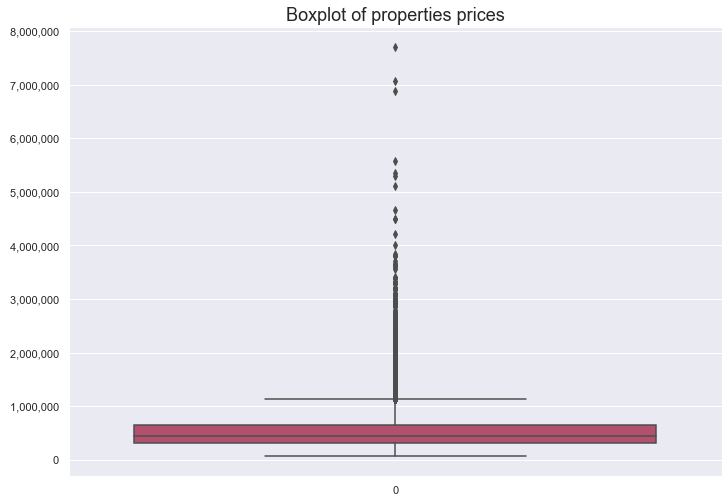

In [15]:
# Checking price outliers
plot_boxplot(df_numeric['price'], title='Boxplot of properties prices')

Will not remove any price value because it is natural that high pattern properties have high values, causing discrepancy with our central tendency

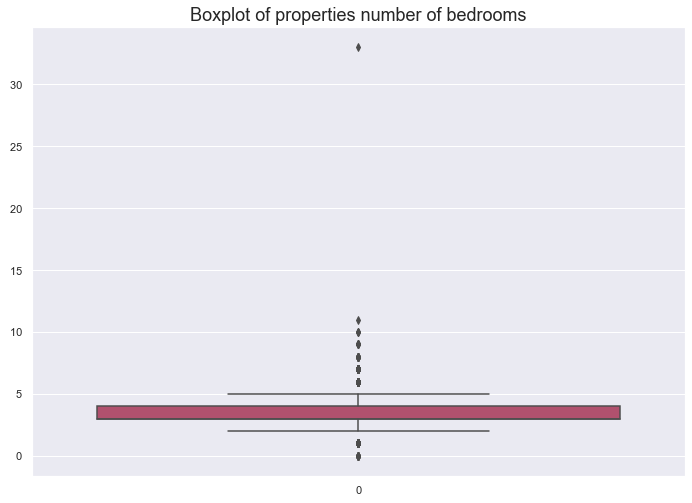

In [16]:
# Checking bedrooms outliers
plot_boxplot(df_numeric['bedrooms'], title='Boxplot of properties number of bedrooms')

There's a single point that is very discrepant compared with others. Surely this one will be removed

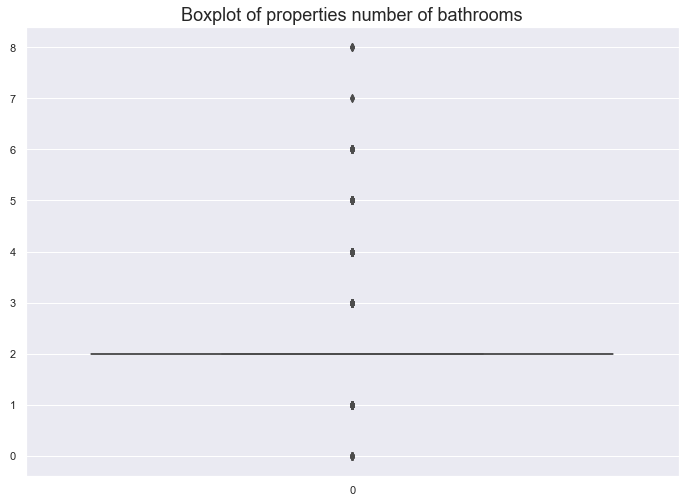

In [17]:
# Checking bedrooms outliers
plot_boxplot(df_numeric['bathrooms'], title='Boxplot of properties number of bathrooms')

Will consider that high pattern property may also have a good amount of bathrooms, so will not remove any value

**Removing Outliers**

In [18]:
# Remove any row with number of bedrooms higher than 30
df = df.drop(index=df.loc[df['bedrooms'] > 30, :].index)

# Check the maximum amount of bedrooms
df['bedrooms'].sort_values(ascending=False)[0:5]

8688     11
13195    10
19085    10
15025    10
6031      9
Name: bedrooms, dtype: int64

# 4. VALIDATING HYPHOTHESIS

## **H1:** Properties that have water front feature are 20% more expensive, on average, than those without a view.

The mean price of properties that have waterfront is 212.42% higher if compared with the ones that don't have


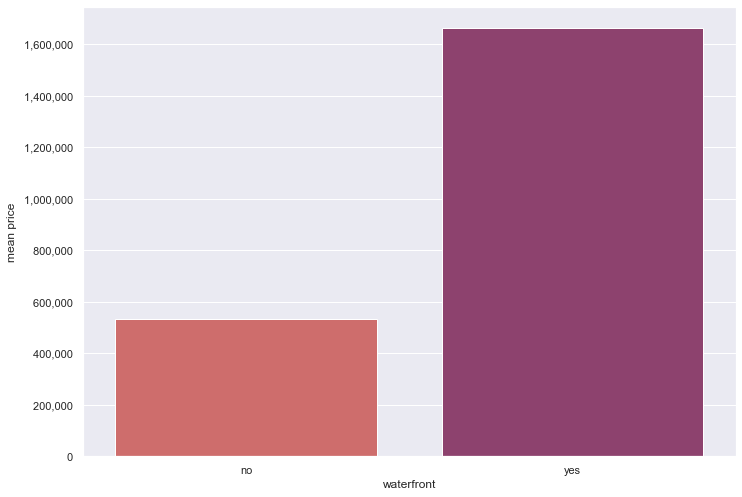

In [19]:
# Creating dataframe to group data by category
h1 = df[['price', 'waterfront']].groupby('waterfront').mean().reset_index()

# Calculate mean difference between the properties with/without waterfront
diff = (h1['price'][1] - h1['price'][0]) 

# Calculate in pct the variation
variation = round((diff / h1['price'][0]) * 100, 2)

# Shows the response
print(f"The mean price of properties that have waterfront is {variation}% higher if compared with the ones that don't have")

## Plotting chart ###

# Plots barchart to express the variation visually
ax = sns.barplot(x=h1['waterfront'], y=h1['price'], palette='flare')

# Set format of y axis scale
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: ,.0f}'))

# Rename y axis label
plt.ylabel('mean price')

plt.show()

## H2: Properties with a construction date less than 1980 are 55% cheaper on average.

Properties built before 1980 have a mean price 14.01% lower if compared with the ones built after


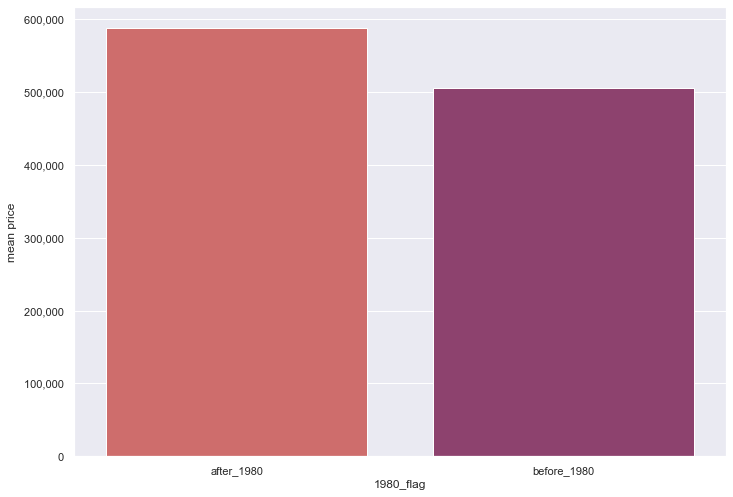

In [20]:
# Create a copy of main dataframe with the information needed to answer the hypothesis
h2_base = df[['price', 'yr_built']].copy()

# Create a flag to categorize if the property was built before/after 1980
h2_base['1980_flag'] = h2_base['yr_built'].apply(lambda x: 'before_1980' if x < 1980 else
                                                           'after_1980' if x >= 1980 else 'NA')

# Group data and take mean price by category
h2 = h2_base[['price', '1980_flag']].groupby('1980_flag').mean().reset_index()

# Calculates the difference between categories
diff = (h2['price'][0] - h2['price'][1]) 

# Calculates the variation
variation = round((diff / h2['price'][0]) * 100, 2)

# Shows the response
print(f"Properties built before 1980 have a mean price {variation}% lower if compared with the ones built after")

## Plotting chart ###

# Plots bar chart to express the variation visually
ax = sns.barplot(x=h2['1980_flag'], y=h2['price'], palette='flare')

# Set format of y axis scale
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: ,.0f}'))

# Rename y axis label
plt.ylabel('mean price')

plt.show()

## H3: Properties without basements have 40% more lot area than those without basements.

Properties without basement have a lot area 22.78% larger if compared with the ones with


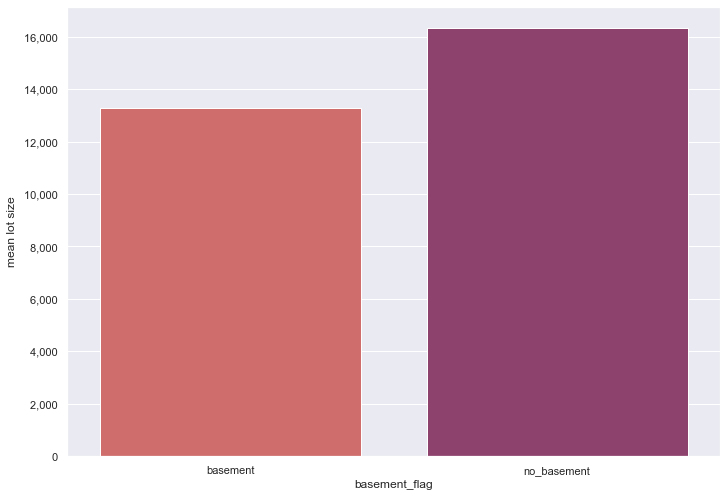

In [21]:
# Create a copy of main dataframe with the information needed to answer the hypothesis
h3_base = df[['sqft_basement', 'sqft_lot']].copy()

# Create a flag to categorize ifi the property have/don't have basement
h3_base['basement_flag'] = h3_base['sqft_basement'].apply(lambda x: 'no_basement' if x == 0 else
                                    'basement' if x >= 1 else 'NA')

# Group data and take mean area by category
h3 = h3_base[['sqft_lot', 'basement_flag']].groupby('basement_flag').mean().reset_index()

# Calculates the difference between categories
diff = (h3['sqft_lot'][1] - h3['sqft_lot'][0]) 

# Calculates the variation
variation = round((diff / h3['sqft_lot'][0]) * 100, 2)

# Shows the response
print(f"Properties without basement have a lot area {variation}% larger if compared with the ones with")

## Plotting chart ###

# Plots barchart to express the variation visually
ax = sns.barplot(x=h3['basement_flag'], y=h3['sqft_lot'], palette='flare')

# Set format of y axis scale
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: ,.0f}'))

# Rename y axis label
plt.ylabel('mean lot size')

plt.show()

## H4: YoY (Year over Year) property price growth is 10%.

We have properties available for 2014 and 2015 years, and the YoY price growth was of 0.7%


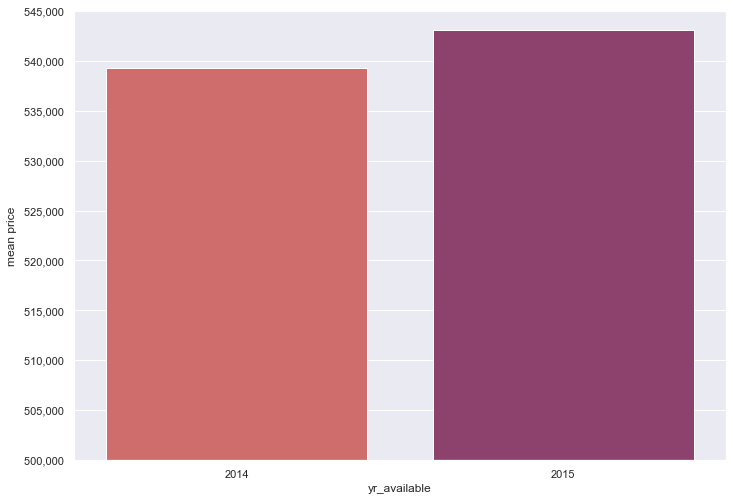

In [22]:
# Create a copy of main dataframe with the information needed to answer the hypothesis
h4_base = df[['date', 'price']].copy()

# Extract year of when the property got available  for purchase
h4_base['yr_available'] = pd.DatetimeIndex(h4_base['date']).year

# Group data and take mean price by year 
h4 = h4_base[['price', 'yr_available']].groupby('yr_available').mean().reset_index()

# Calculates the difference between categories
diff = (h4['price'][1] - h4['price'][0]) 

# Calculates the variation
variation = round((diff / h4['price'][0]) * 100, 2)

# Shows the response
print(f"We have properties available for 2014 and 2015 years, and the YoY price growth was of {variation}%")

## Plotting chart ###

# Plots line chart to express the variation visually
ax = sns.barplot(x=h4['yr_available'], y=h4['price'], palette='flare')

# Set format of y axis scale
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: ,.0f}'))

# Set range in y axis
ax.set_ylim([500000, 545000])

# Rename y axis label
plt.ylabel('mean price')

plt.show()

In [23]:
h4

,yr_available,price
0,2014,"539,314.59"
1,2015,"543,108.29"


## H5: Properties with 3 bathrooms or more have a MoM (Month over Month) growth of 15% in price.

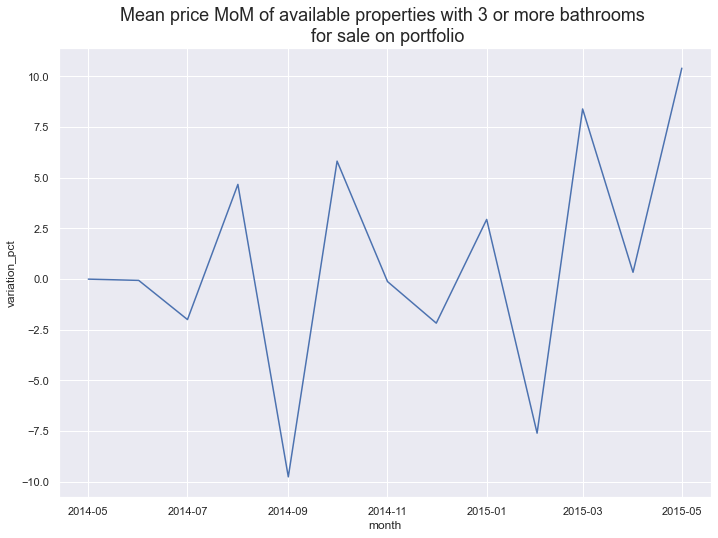

In [24]:
# Create a copy of main dataframe with the information needed to answer the hypothesis
h5_base = df.loc[df['bathrooms'] >= 3, ['price', 'bathrooms', 'date']].copy().reset_index()

# Extract year and month
h5_base['month'] = h5_base['date'].apply(lambda x: x.strftime('%m-%Y'))

# Converts it to date format
h5_base['month'] = pd.to_datetime(h5_base['month'], format=('%m-%Y'))

# Group data and take mean price by month
h5 = h5_base[['price', 'month']].groupby('month').mean().reset_index().sort_values(by='month')

# Creates an empty column that will receive the variation over months in percentage
h5['variation_pct'] = 'NA'

# Calculates the variation
for i in range(len(h5)):
    
    if i == 0:
        h5.loc[i, 'variation_pct'] = 0
        
    else:
        h5.loc[i, 'variation_pct'] = ((h5.loc[i, 'price'] - h5.loc[i-1, 'price']) / h5.loc[i, 'price']) * 100
        
## Plot line chart ##

ax = sns.lineplot(data=h5, x='month', y='variation_pct')

# Settting title
plt.title('Mean price MoM of available properties with 3 or more bathrooms \n for sale on portfolio', fontsize=18)

plt.show()

## H6: Properties with 1 bedroom are 30% cheaper on average compared to properties with 2 or more.

Properties with one bedrooms are 70.81% cheaper if compared with the ones with two or more


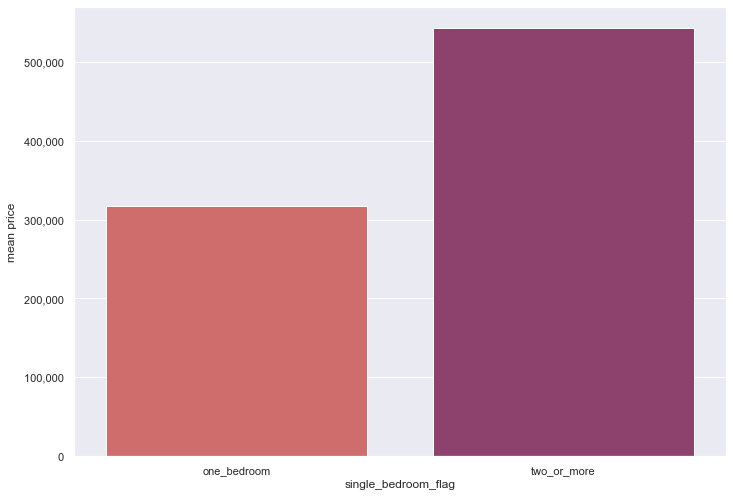

In [25]:
# Create a copy of main dataframe with the information needed to answer the hypothesis
h6_base = df[['price', 'bedrooms']].copy()

# Creates a classification wether the property have one or more bedrooms
h6_base['single_bedroom_flag'] = h6_base['bedrooms'].apply(lambda x: 'one_bedroom' if x == 1 else
                                                                     'two_or_more'if x > 1 else 'NA')

# Dropping NA values
h6_base = h6_base.loc[h6_base['single_bedroom_flag'] != 'NA', :].reset_index()

# Group data and take mean price by category
h6 = h6_base[['price', 'single_bedroom_flag']].groupby('single_bedroom_flag').mean().reset_index()

# Calculates the difference between categories
diff = (h6['price'][1] - h6['price'][0]) 

# Calculates the variation
variation = round((diff / h6['price'][0]) * 100, 2)

# Shows the response
print(f"Properties with one bedrooms are {variation}% cheaper if compared with the ones with two or more")

## Plotting chart ###

# Plots line chart to express the variation visually
ax = sns.barplot(x=h6['single_bedroom_flag'], y=h6['price'], palette='flare')

# Set format of y axis scale
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: ,.0f}'))

# Rename y axis label
plt.ylabel('mean price')

plt.show()

## H7: Total properties available for purchase grew 15% YoY.

The amount of properties available for purchase droped 113.51% YoY according with properties in database


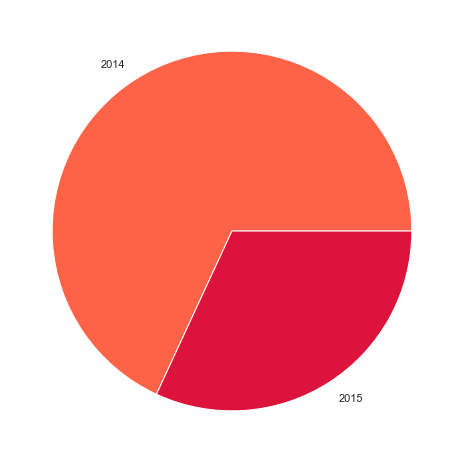

In [26]:
# Create a copy of main dataframe with the information needed to answer the hypothesis
h7_base = df[['date', 'id']].copy()

# Extract year of when the property got available 
h7_base['yr_available'] = pd.DatetimeIndex(h7_base['date']).year

 # Group data and take count id by year 
h7 = h7_base[['id', 'yr_available']].groupby('yr_available').count().reset_index()

# Calculates the difference between categories
diff = (h7['id'][0] - h7['id'][1]) 

# Calculates the variation
variation = round((diff / h7['id'][1]) * 100, 2)

# Shows the response
print(f"The amount of properties available for purchase droped {variation}% YoY according with properties in database")

## Plotting chart ###

# Plots line chart to express the variation visually
ax = plt.pie(x=h7['id'], labels=h7['yr_available'], colors=['tomato', 'crimson'])

# # Set format of y axis scale
# ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: ,.0f}'))

# # Rename y axis label
# plt.ylabel('mean price')

plt.show()

In [27]:
h7

,yr_available,id
0,2014,14598
1,2015,6837


## H8: The standard deviation of the price of properties that have more than 2 bedrooms is 40% lower than the others.

The std deviation of properties with more than two bedrooms is 96.01% higher if compared with the ones with two or less


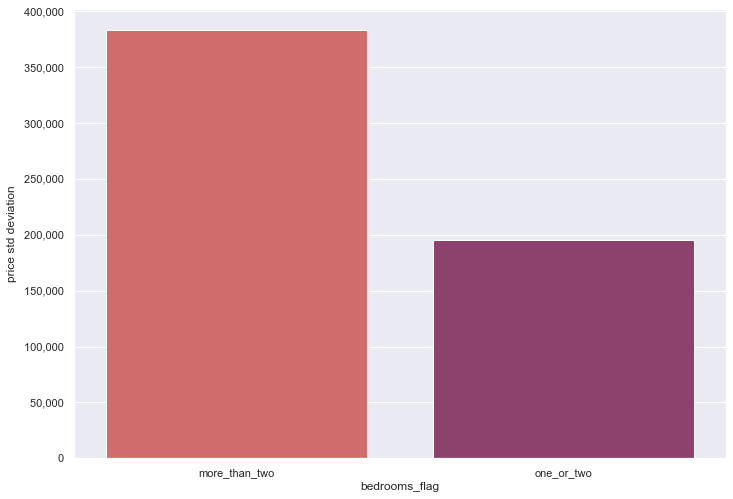

In [28]:
# Create a copy of main dataframe with the information needed to answer the hypothesis
h8_base = df.loc[df['bedrooms'] >= 1, ['bedrooms', 'price']].reset_index()

# Creates classification of number of bedrooms
h8_base['bedrooms_flag'] = h8_base['bedrooms'].apply(lambda x: 'one_or_two' if x <= 2 else
                                                               'more_than_two' if x > 2 else 'NA')

# Group data and take std deviation of price by category
h8 = h8_base[['price', 'bedrooms_flag']].groupby('bedrooms_flag').std().reset_index()

# Calculates the difference between categories
diff = (h8['price'][0] - h8['price'][1]) 

# Calculates the variation
variation = round((diff / h8['price'][1]) * 100, 2)

# Shows the response
print(f"The std deviation of properties with more than two bedrooms is {variation}% higher if compared with the ones with two or less")
## Plotting chart ###

# Plots line chart to express the variation visually
ax = sns.barplot(x=h8['bedrooms_flag'], y=h8['price'], palette='flare')

# Set format of y axis scale
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x: ,.0f}'))

# Rename y axis label
plt.ylabel('price std deviation')

plt.show()

## H9: Properties that have undergone renovation are 50% in better condition compared to properties that have not been renovated

In [29]:
# Create a copy of main dataframe with the information needed to answer the hypothesis
h9_base = df[['condition', 'yr_renovated']].copy()

# Creates classification for properties that got renovated/didn't get and normalize condition to 1 or 0
h9_base['renovated'] = h9_base['yr_renovated'].apply(lambda x: 'renovated' if x > 0 else 'no_renovated')
h9_base['condition'] = h9_base['condition'].apply(lambda x: 1 if x == 4 or x == 5 else 0)

# Group data and take mean for each category
h9_base[['renovated', 'condition']].groupby('renovated').mean()

,condition
renovated,
no_renovated,0.35
renovated,0.19


## H10: Renovated properties from 1980 onwards are 50% in better condition compared to all other properties (renovated or not)

In [30]:
# Create a copy of main dataframe with the information needed to answer the hypothesis
h10_base = df[['condition', 'yr_renovated']].copy()

# Creates classification for properties that got renovated/didn't get and normalize condition to 1 or 0
h10_base['renovated'] = h10_base['yr_renovated'].apply(lambda x: 'renovated' if x >= 1980 else 'no_renovated')
h10_base['condition'] = h10_base['condition'].apply(lambda x: 1 if x == 4 or x == 5 else 0)

# Group data and take mean for each category
h10_base[['renovated', 'condition']].groupby('renovated').mean()

,condition
renovated,
no_renovated,0.35
renovated,0.15


Important to know how many were renoveted according to our parameters

In [31]:
h10_base['renovated'].value_counts()

no_renovated    20646
renovated         789
Name: renovated, dtype: int64

If we include 3 as good condition

In [32]:
# Create a copy of main dataframe with the information needed to answer the hypothesis
h10_base = df[['condition', 'yr_renovated']].copy()

# Creates classification for properties that got renovated/didn't get and normalize condition to 1 or 0
h10_base['renovated'] = h10_base['yr_renovated'].apply(lambda x: 'renovated' if x >= 1980 else 'no_renovated')
h10_base['condition'] = h10_base['condition'].apply(lambda x: 1 if x == 3 or x == 4 or x == 5 else 0)

# Group data and take mean for each category
h10_base[['renovated', 'condition']].groupby('renovated').mean()

,condition
renovated,
no_renovated,0.99
renovated,1.00


In [33]:
df['condition'].value_counts(normalize=True)

3   0.65
4   0.26
5   0.08
2   0.01
1   0.00
Name: condition, dtype: float64

# 5.MAIN INSIGHTS

- Properties with a waterfont view are 200% more expensive on average. Getting one of these properties for a low price represents good business

- Properties built before 1980 are 14% cheaper on average. There is no big price disparity if you use this cut-off as a comparison

- Properties without a basement have 22% more lot area. If we look for properties with larger lot areas, we can look at these without basements

- YoY property price grew 0.7%

- One-bedroom properties are 70% cheaper compared to properties with 2 or more bedrooms

- The amount of properties available for purchase fell 113% YoY (2014 to 2015)

- The standard deviation of properties with two or more bedrooms is 96% higher compared to properties with two or fewer

- The property having been renovated does not impact their condition. The condition is basically the same comparing these two categories

With the information collected, we will use only the **waterfront** variable to determine which are the best properties to buy, where if we have a property with this characteristic and a competitive price, it will have priority.